In [1]:
import numpy as np
import pylab as pl

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the data
data = load_boston()
X = data.data
y = data.target

In [3]:
# Split the range of target values into low, mid, and high and reassign the target values into
# three categorical values 0, 1, and 2, representing low, mid and high range of values, respectively.
maximum = np.max(y)
minimum = np.min(y)
r = maximum - minimum + 1
low = r / 3
mid = r / 3 * 2

for idx in range(0, int(len(y))):
    if y[idx] < low:
        y[idx] = 0
    elif y[idx] < mid:
        y[idx] = 1
    else:
        y[idx] = 2

In [4]:
# 1. Split the dataset into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
# 2. Use scikit-learn’s DecisionTreeClassifier to train a supervised learning model
from sklearn import tree
clf0 = tree.DecisionTreeClassifier()
clf0 = clf0.fit(X_train, y_train)

In [6]:
# 3. Report the tree depth, number of leaves, feature importance, train score, and test score of the tree
tree_depth = clf0.get_depth()
print("tree depth: " + str(tree_depth))
print("number of leaves: " + str(clf0.get_n_leaves()))
print("feature importance:\n" + str(clf0.feature_importances_))
print("train score: " + str(clf0.score(X_train, y_train)))
print("test score: " + str(clf0.score(X_test, y_test)))

tree depth: 10
number of leaves: 42
feature importance:
[0.30266115 0.         0.00742582 0.         0.05929137 0.30703239
 0.04588491 0.02734225 0.00792088 0.00179132 0.05690196 0.03172667
 0.15202128]
train score: 1.0
test score: 0.7828947368421053


In [7]:
# 4. Show the visual output of the decision tree
feature_names = data.feature_names
class_names = ['low', 'mid', 'high']

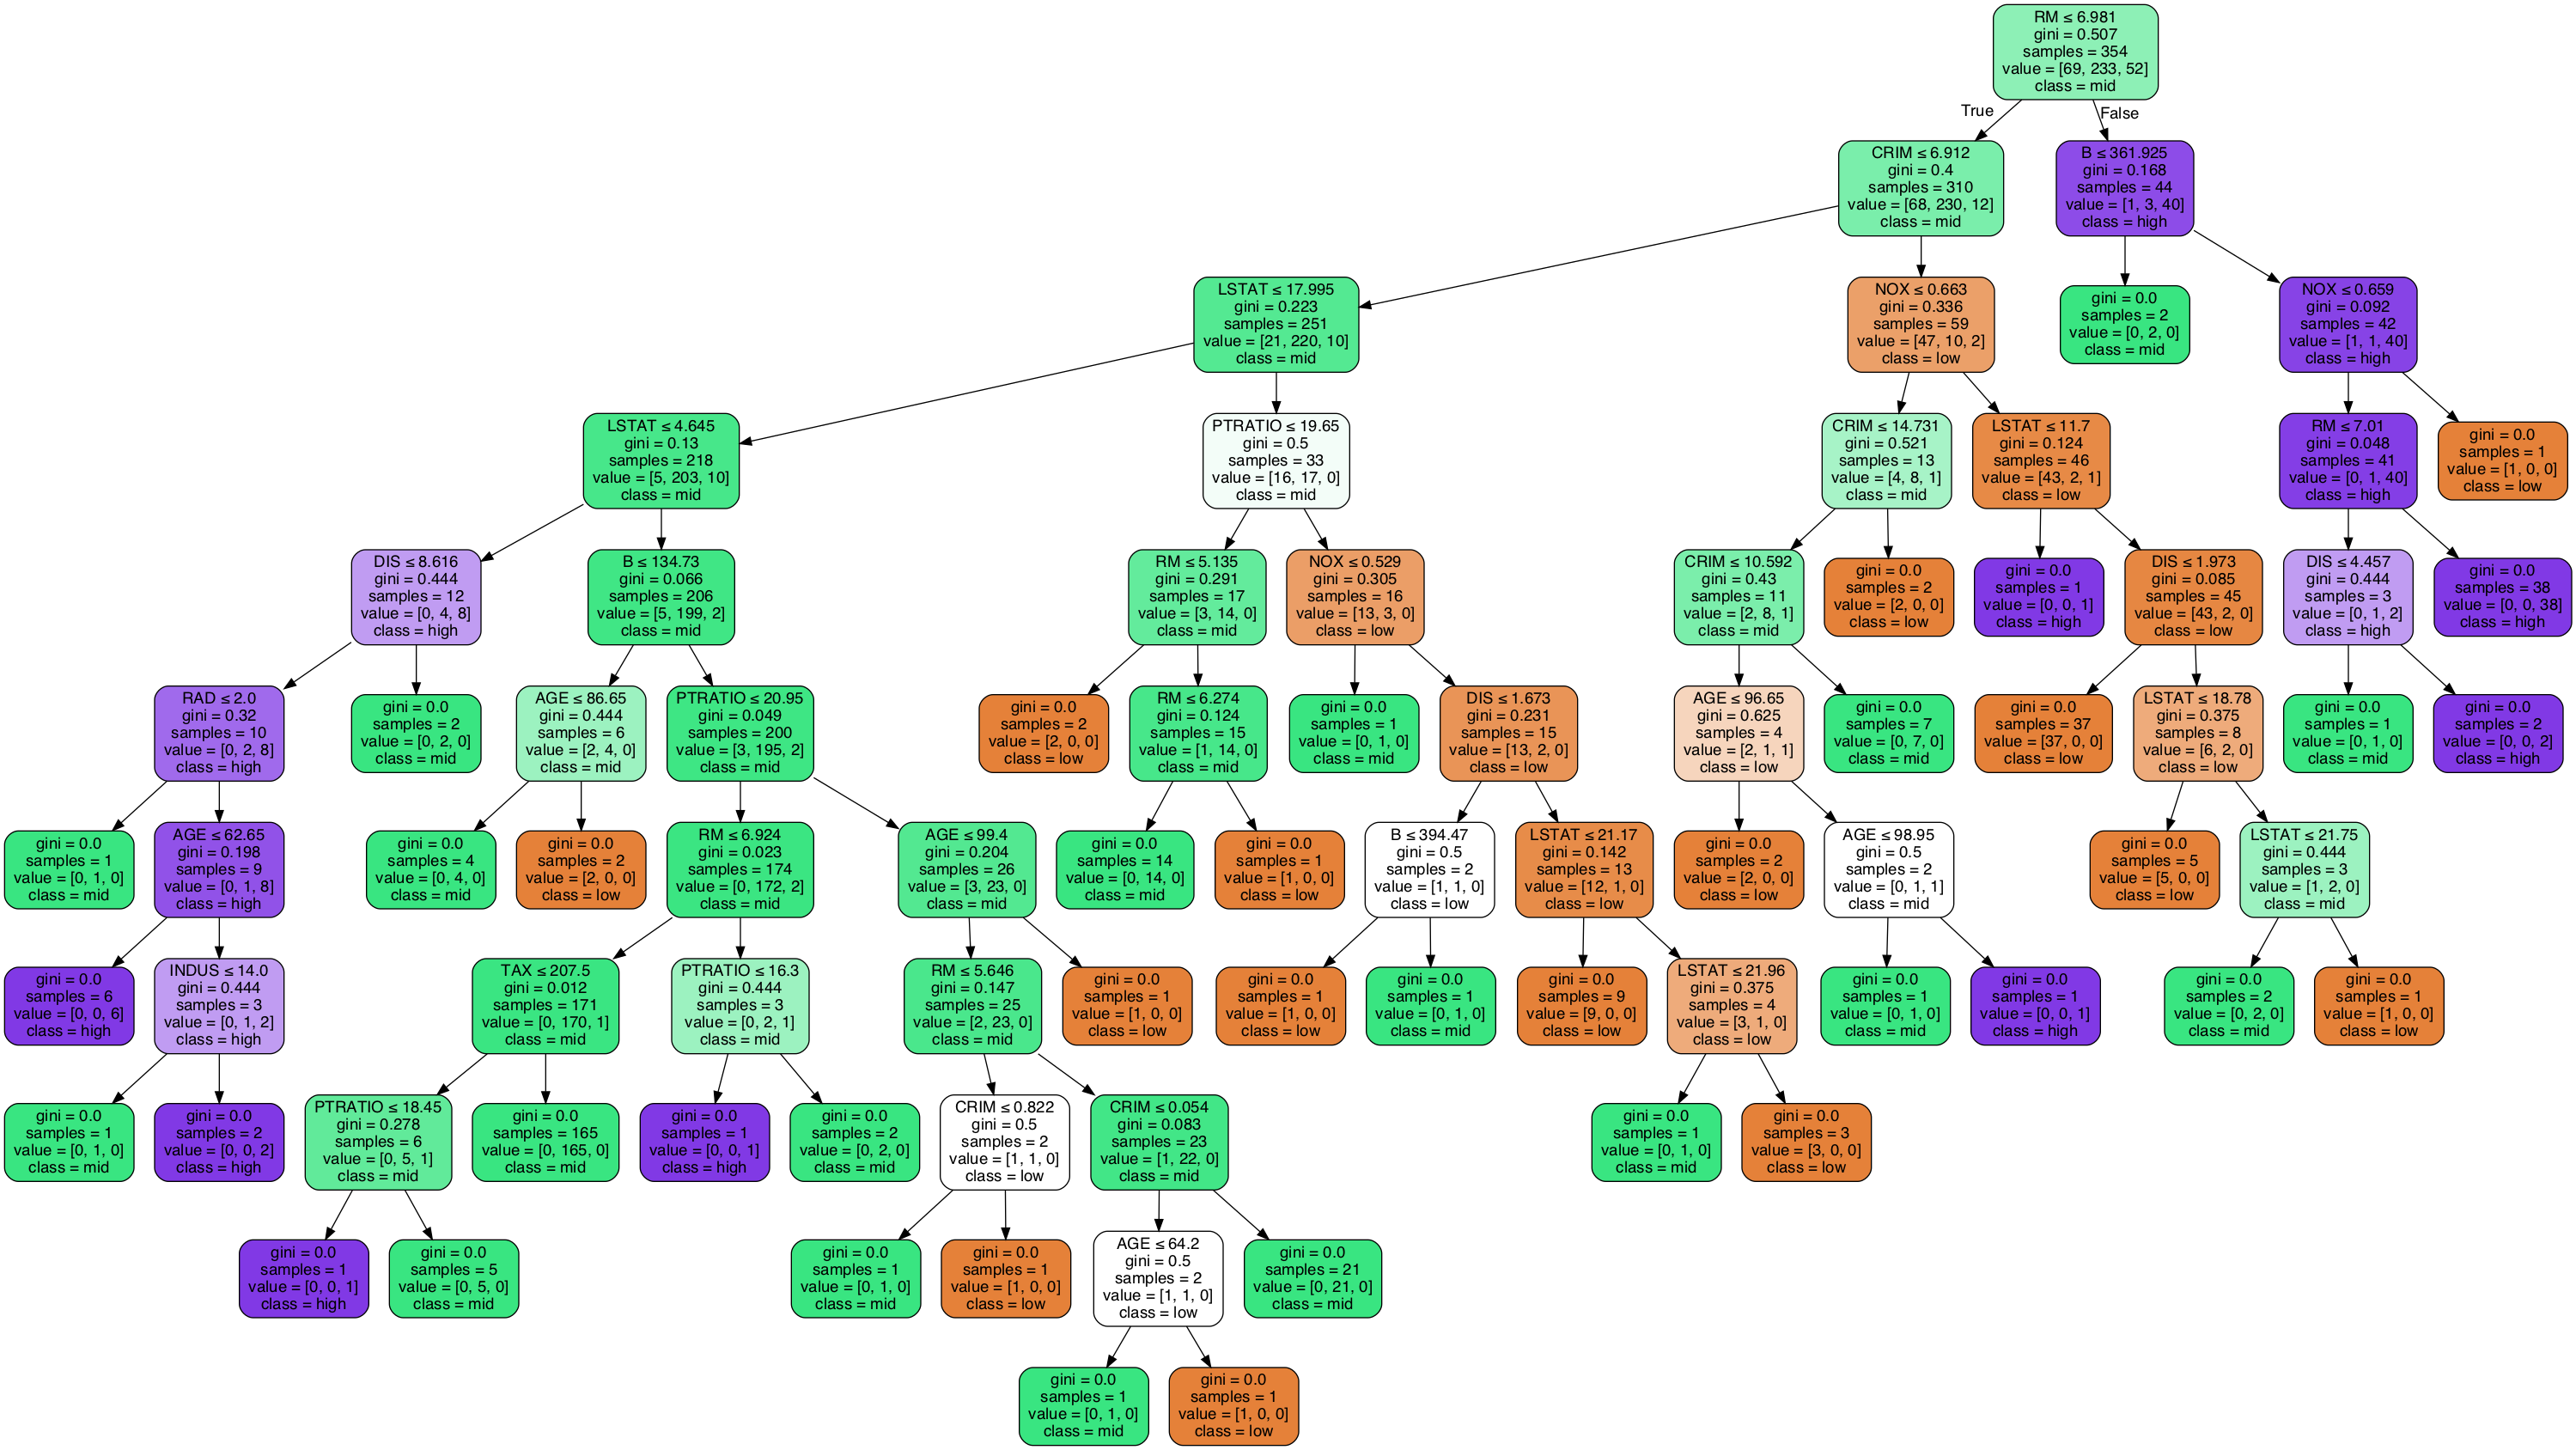

In [8]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf0, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, 
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
# 5. Generate (Td-1) decision trees on the same training set
# 6. For each of the (Td-1) trees, report tree depth, number of leaves, feature importance,
# train score, and test score of the tree.
max_test_score = 0
max_clf = None
max_depth = 0

for d in range(1, tree_depth):
    clf1 = tree.DecisionTreeClassifier(max_depth=d)
    clf1 = clf1.fit(X_train, y_train)
    depth = clf1.get_depth()
    print("tree depth: " + str(depth))
    print("number of leaves: " + str(clf1.get_n_leaves()))
    print("feature importance:\n" + str(clf1.feature_importances_))
    print("train score: " + str(clf1.score(X_train, y_train)))
    test_score = clf1.score(X_test, y_test)
    if test_score > max_test_score:
        max_test_score = test_score
        max_clf = clf1
        max_depth = depth
    print("test score: " + str(test_score) + "\n")

tree depth: 1
number of leaves: 2
feature importance:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
train score: 0.7627118644067796
test score: 0.6973684210526315

tree depth: 2
number of leaves: 4
feature importance:
[0.48217588 0.         0.         0.         0.         0.48226339
 0.         0.         0.         0.         0.         0.03556074
 0.        ]
train score: 0.8728813559322034
test score: 0.7828947368421053

tree depth: 3
number of leaves: 7
feature importance:
[0.40048526 0.         0.         0.         0.07681512 0.40055794
 0.         0.         0.         0.         0.         0.02953601
 0.09260566]
train score: 0.8870056497175142
test score: 0.7697368421052632

tree depth: 4
number of leaves: 12
feature importance:
[0.36983348 0.         0.         0.         0.05203498 0.34626177
 0.         0.         0.         0.         0.04732912 0.025209
 0.15933165]
train score: 0.9350282485875706
test score: 0.7894736842105263

tree depth: 5
number of leaves: 19
feature impo

tree depth of the tree with highest test score: 5


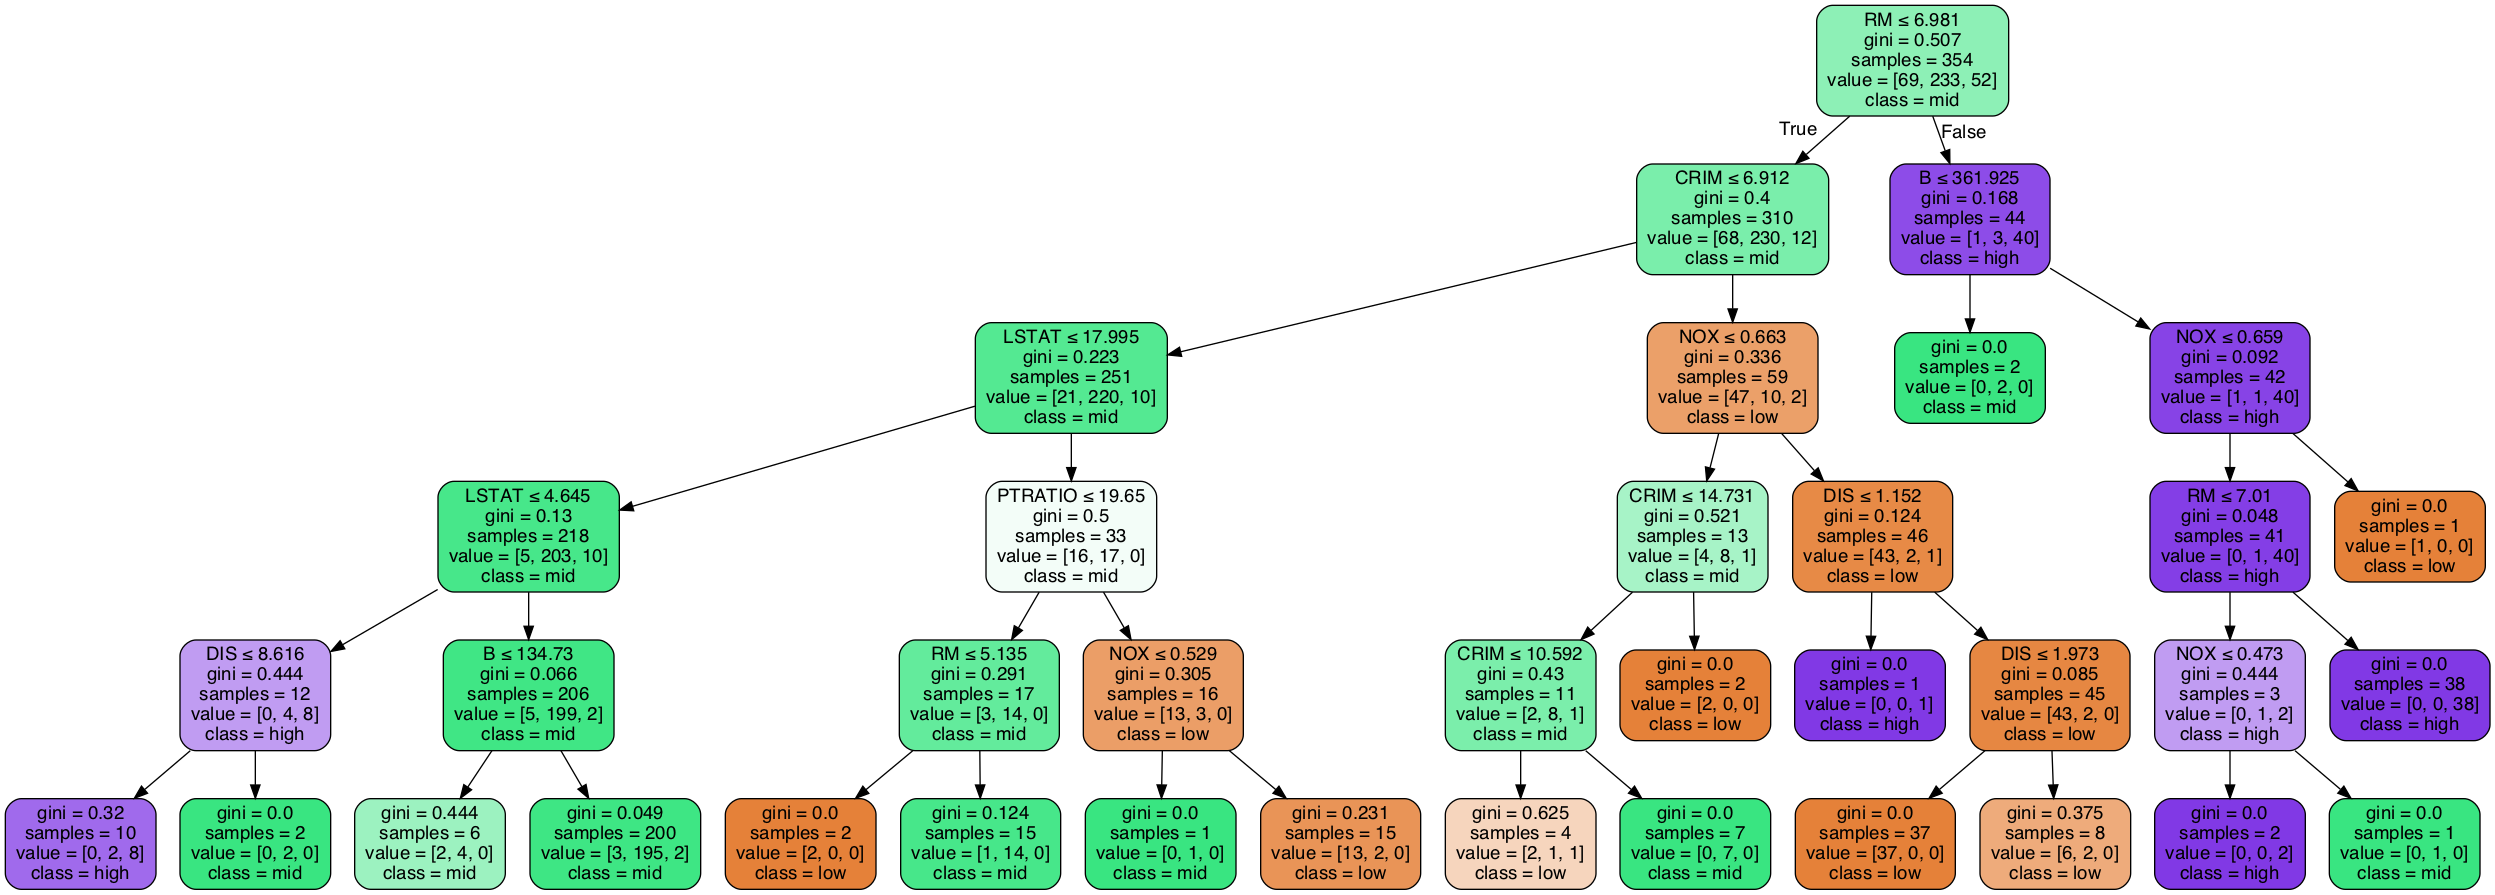

In [10]:
# 7. Show the visual output of the decision tree with highest test score from the (Td-1)trees.
print("tree depth of the tree with highest test score: " + str(max_depth)) 
dot_data1 = tree.export_graphviz(max_clf, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, 
                                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())